In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load data as df
data=pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#features and info.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
data['Class'].value_counts()
# class imbalance problem

0    284315
1       492
Name: Class, dtype: int64

In [7]:
#sns.kdeplot(data['V1'])

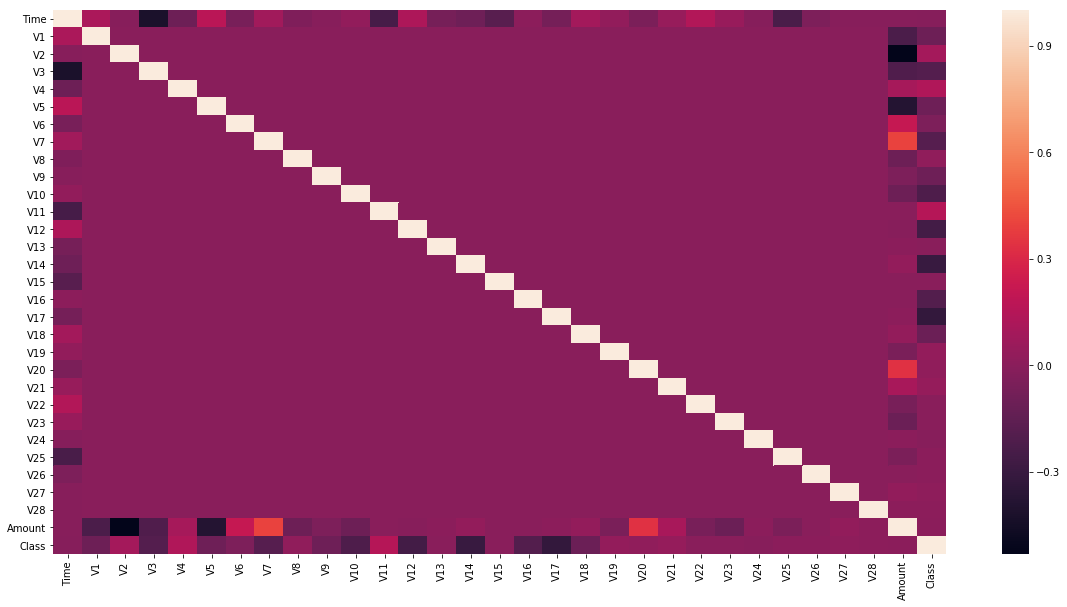

In [8]:
# Heatmap of all the features
plt.figure(figsize=(20,10))
corr=data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [9]:
#normalising data except time and class columns
data2= (data.iloc[:,1:-1] - data.iloc[:,1:-1].mean()) / (data.iloc[:,1:-1].max() - data.iloc[:,1:-1].min())
data2['Class']=data['Class']

#Converting time in seconds to minutes and hours 
data2['Hour'] = data['Time'] //3600
data2['Minutes'] = data['Time'] //60
data2['Hour'].replace(-0,0,inplace=True)
data2['Minutes'].replace(-0,0,inplace=True)

data=data2
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,Hour,Minutes
0,-0.023101,-0.000768,0.043951,0.061092,-0.002278,0.004649,0.001460,0.001059,0.012532,0.001878,...,-0.001641,0.009019,0.007215,-0.030892,0.002465,-0.000427,0.002385,0,0.0,0.0
1,0.020248,0.002808,0.002885,0.019866,0.000404,-0.000828,-0.000480,0.000913,-0.008799,-0.003455,...,0.001504,-0.045794,0.009384,0.020565,-0.000166,0.000299,-0.003334,0,0.0,0.0
2,-0.023077,-0.014141,0.030727,0.016835,-0.003388,0.018102,0.004822,0.002657,-0.052177,0.004296,...,0.013506,-0.092880,-0.018391,-0.022721,-0.001022,-0.001213,0.011300,0,0.0,0.0
3,-0.016416,-0.001954,0.031070,-0.038269,-0.000069,0.012539,0.001448,0.004049,-0.047781,-0.001137,...,-0.002826,-0.158408,0.036339,-0.036252,0.001158,0.001247,0.001368,0,0.0,0.0
4,-0.019677,0.009261,0.026837,0.017866,-0.002741,0.000964,0.003612,-0.002902,0.028170,0.015581,...,-0.002041,0.019036,-0.011564,0.082048,0.004050,0.004366,-0.000715,0,0.0,0.0


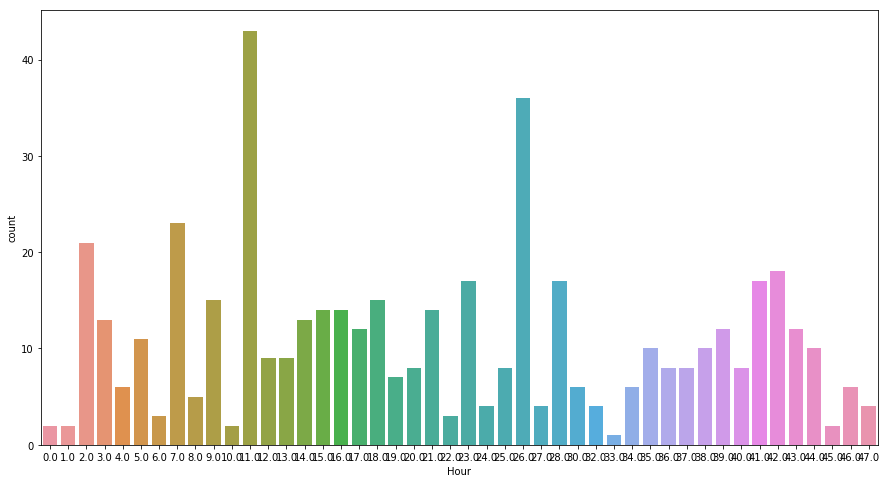

In [10]:
# Hourly frauds
plt.figure(figsize=(15,8))
sns.countplot(data[data['Class']==1]['Hour'])

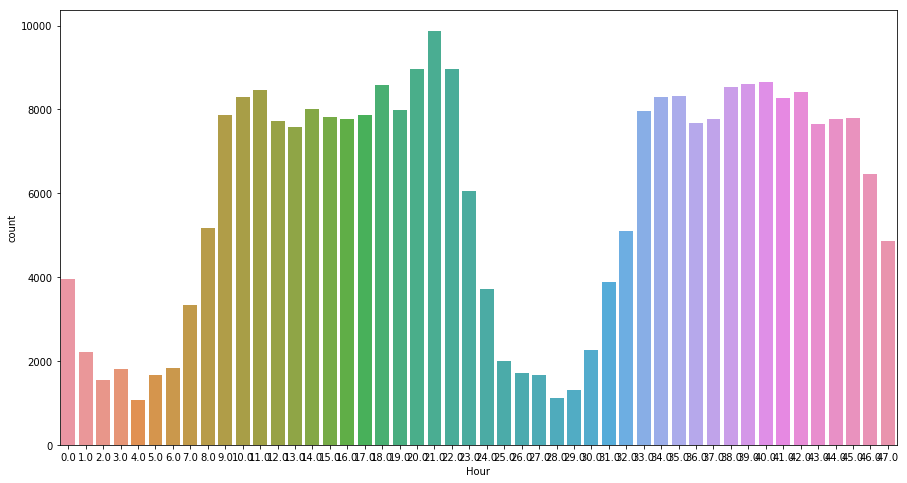

In [11]:
# Hourly non frauds
plt.figure(figsize=(15,8))
sns.countplot(data[data['Class']==0]['Hour'])

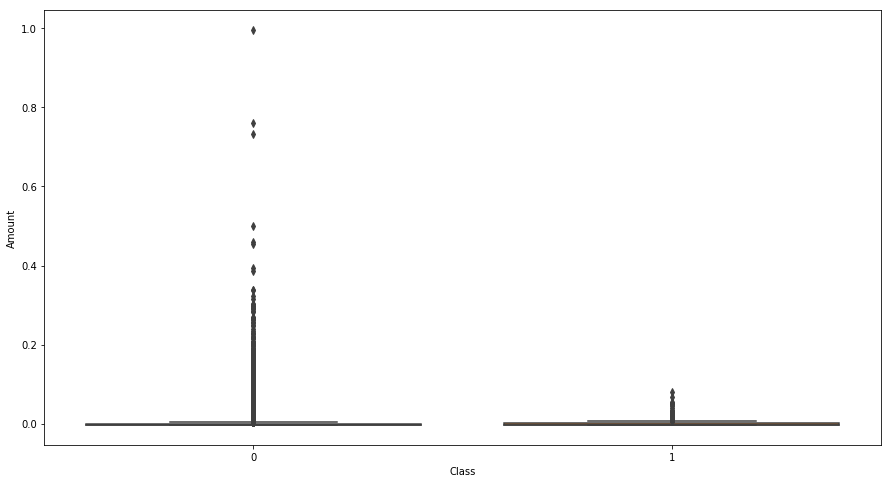

In [12]:
# Fraudalent and Genuine transaction amounts  (Boxplot)
plt.figure(figsize=(15,8))
sns.boxplot(x=data['Class'],y=data['Amount'])

# Metric function(sarab sir)

In [4]:
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support
from sklearn.metrics import accuracy_score, roc_auc_score
def get_performance_metrics(y_test,model_predictions):
    # Accuracy
    model_accuracy = accuracy_score(y_test,model_predictions)
    print("Accuracy is ", model_accuracy)

    # precision, recall, f1 score
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_test,model_predictions)
    print('Precision for each class is ', model_precision)
    print('Recall/sensitivity for each class is ', model_recall)
    print('F1 Score for each class is ', model_f1)

    # roc_auc
    model_roc_auc = roc_auc_score(y_test,model_predictions)
    print('AUC-ROC score is ', model_roc_auc)

    # confusion matrix
    model_confusion_matrix = confusion_matrix(y_test,model_predictions)
    print('confusion matrix is :-->')
    print(model_confusion_matrix)
    

# Splitting data

In [45]:
# Separate input features (X) and target variable (y)

y = data.Class
X = data.drop('Class', axis=1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Oversampling train data

In [42]:
from sklearn.utils import resample

dt=pd.DataFrame(X_train)
dt['Class']=y_train

# Separate majority and minority classes
df_majority = dt[dt.Class==0]
df_minority = dt[dt.Class==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_majority.shape[0],    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Class.value_counts()

1    227440
0    227440
Name: Class, dtype: int64

# Logistic Regression with oversampling

In [43]:
from sklearn.linear_model import LogisticRegression


y_traino = df_upsampled.Class
X_traino = df_upsampled.drop('Class', axis=1)

# Train model
clf_1 = LogisticRegression().fit(X_traino, y_traino)
 
# Predict
pred_y_1 = clf_1.predict(X_test)
 
get_performance_metrics(y_test, pred_y_1)

Accuracy is  0.97133176503634
Precision for each class is  [0.99981904 0.04529412]
Recall/sensitivity for each class is  [0.97146374 0.88505747]
F1 Score for each class is  [0.98543746 0.08617795]
AUC-ROC score is  0.9282606037640521
confusion matrix is :-->
[[55252  1623]
 [   10    77]]


# Logistic regression with smote

In [46]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

# Train model
clf_1 = LogisticRegression().fit(X_train, y_train)
 
# Predict
pred_y_1 = clf_1.predict(X_test)
 
get_performance_metrics(y_test, pred_y_1)

Accuracy is  0.9856746602998491
Precision for each class is  [0.99980386 0.08522727]
Recall/sensitivity for each class is  [0.9858464  0.87209302]
F1 Score for each class is  [0.99277608 0.1552795 ]
AUC-ROC score is  0.9289697129782128
confusion matrix is :-->
[[56071   805]
 [   11    75]]


#SVM (not running)

In [ ]:
y = data.Class
X = data.drop('Class', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.svm import SVC
svc_model = SVC(kernel='linear', 
            class_weight='balanced', # penalize,   class_weight={0: 100,1: 1}
            probability=True)
svc_model.fit(X_train,y_train)
svc_predictions = svc_model.predict(X_test)
get_performance_metrics(y_test,svc_predictions)

# Random Forest

In [1]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
y = data.Class
X = data.drop('Class', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Train model
clf_4 = RandomForestClassifier()
clf_4.fit(X_train, y_train)
 # Predict on training set
pred_y_4 = clf_4.predict(X_test)

In [10]:
get_performance_metrics(y_test,pred_y_4)

Accuracy is  0.9993679997191109
Precision for each class is  [0.99945505 0.93421053]
Recall/sensitivity for each class is  [0.99991206 0.69607843]
F1 Score for each class is  [0.99968351 0.79775281]
AUC-ROC score is  0.8479952480464573
confusion matrix is :-->
[[56855     5]
 [   31    71]]


# smote on original data

In [5]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
y_t = data.Class
X_t = data.drop('Class', axis=1)
X_t, y_t = smt.fit_sample(X_t, y_t)

In [8]:
len(pd.DataFrame(X_t))

568630